# Homework 4
## Author: Matthew Stickle

# WS 9 Q4

In [1]:
import random
import time

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import multivariate_normal

from loader import loadmnist

In [2]:
print("4a: Loading in train and test data")

4a: Loading in train and test data


In [3]:
# load in training set
x, y = loadmnist('train-images.idx3-ubyte', 'train-labels.idx1-ubyte')
print(f"x type: {type(x)} x shape: {x.shape}\ny type: {type(y)} y shape: {y.shape}")

x type: <class 'numpy.ndarray'> x shape: (60000, 784)
y type: <class 'numpy.ndarray'> y shape: (60000,)


In [4]:
# load in testing set
test_x, test_y = loadmnist('t10k-images.idx3-ubyte', 't10k-labels.idx1-ubyte')
print(f"test_x type: {type(test_x)} test_x shape: {test_x.shape}\nx_true type: {type(test_y)} x_true shape: {test_y.shape}")

test_x type: <class 'numpy.ndarray'> test_x shape: (10000, 784)
x_true type: <class 'numpy.ndarray'> x_true shape: (10000,)


In [5]:
print("4b: Split training into train and validation set")

4b: Split training into train and validation set


In [6]:
# split train images and labels into train and validation
x_train, x_val, x_true, val_true = train_test_split(x, y, test_size=0.16666, random_state=0)
print(f"x_train type: {type(x_train)} x_train shape: {x_train.shape}\nx_true type: {type(x_true)} x_true shape: {x_true.shape}")
print(f"x_val type: {type(x_val)} x_val shape: {x_val.shape}\nval_true type: {type(val_true)} x_true shape: {val_true.shape}")
assert x_train.shape[0] == 50000

x_train type: <class 'numpy.ndarray'> x_train shape: (50000, 784)
x_true type: <class 'numpy.ndarray'> x_true shape: (50000,)
x_val type: <class 'numpy.ndarray'> x_val shape: (10000, 784)
val_true type: <class 'numpy.ndarray'> x_true shape: (10000,)


In [7]:
print("4c: Part 1: Find probabilities of digits")

4c: Part 1: Find probabilities of digits


In [8]:
# determine class probabilities
train_size = x_train.shape[0]
digits, counts = np.unique(x_true, return_counts=True)
digit_probs = {d: c/train_size for d, c in zip(digits, counts)}
assert sum(digit_probs.values()) == 1

In [9]:
for k, v in digit_probs.items():
    print(f"p_{k} = {v:0.2f}")

p_0 = 0.10
p_1 = 0.11
p_2 = 0.10
p_3 = 0.10
p_4 = 0.10
p_5 = 0.09
p_6 = 0.10
p_7 = 0.10
p_8 = 0.10
p_9 = 0.10


In [10]:
def get_gauss_params(data, labels, *, c=0):
    g = {}
    s_cov = c * np.eye(784)
    for l in np.unique(labels):
        x = data[labels == l, :]
        m = np.mean(x, axis = 0)
        cov = np.cov(x, rowvar=False)
        assert m.shape[0] == cov.shape[0]
        cov = s_cov + cov
        g[l] = {
            'm':   m,
            'cov': cov
        }
    return g

In [11]:
def predict(data, probs, g):
    res = np.full([data.shape[0], 10], -np.inf)
    for d, params in g.items():
        pdf = multivariate_normal.logpdf(data, mean=params['m'], cov=params['cov'])
        res[:,d] = (pdf + np.log(probs[d]))
    return np.argmax(res, axis=1), res

In [12]:
start = time.time()
c_range = np.linspace(0.001, 10000, num=500)
c_acc = np.full(c_range.shape, -np.inf)
for i, c in enumerate(c_range):
    g = get_gauss_params(x_train, x_true, c=c)
    pred, _ = predict(x_val, digit_probs, g)
    acc = accuracy_score(val_true, pred)
    c_acc[i] = acc
end = time.time() - start
print(end)

1148.5200896263123


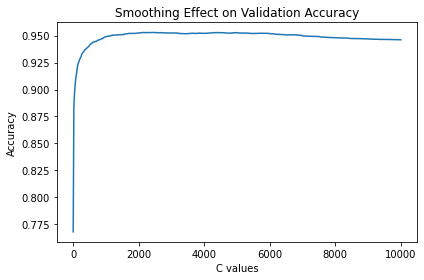

In [13]:
# plotting
fig = plt.figure()

plt.plot(c_range, c_acc)
plt.title('Smoothing Effect on Validation Accuracy')
plt.xlabel('C values')
plt.ylabel('Accuracy')
fig.patch.set_facecolor('white')
plt.tight_layout()
plt.show()

In [14]:
print(f"4d: Best smoothing value, C, is {c_range[np.argmax(c_acc)]:.2f} with error rate {(1 - np.max(c_acc))*100:.2f}%")

4d: Best smoothing value, C, is 2464.93 with error rate 4.70%


In [15]:
print("4c Part 2: Mean and covariance for each digit")
print("Uncomment to see mean and covariance for each digit")
print("Size of mean and covariance matrix (the size is the same for all digits since it is the mean of pixels.")
print(f"Size of mean for digit 0: {g[0]['m'].shape}")
print(f"Size of cov for digit 0: {g[0]['cov'].shape}")
# for k, v in g.items():
#     print(f"{k} density parameters")
#     print(f"Mean: {v['m']}")
#     print(f"Cov: {v['cov'].shape}")

4c Part 2: Mean and covariance for each digit
Uncomment to see mean and covariance for each digit
Size of mean and covariance matrix (the size is the same for all digits since it is the mean of pixels.
Size of mean for digit 0: (784,)
Size of cov for digit 0: (784, 784)


In [16]:
# test_x, test_y
g = get_gauss_params(x_train, x_true, c=c_range[np.argmax(c_acc)])
pred_y, _ = predict(test_x, digit_probs, g)
acc = accuracy_score(test_y, pred_y)

In [17]:
# Pick random 5 images
random.seed(a=0)
rand_imgs = random.sample(np.argwhere(pred_y != test_y).tolist(), 5)

4e: 5 random misclassified images
Error rate for test set is 4.36%


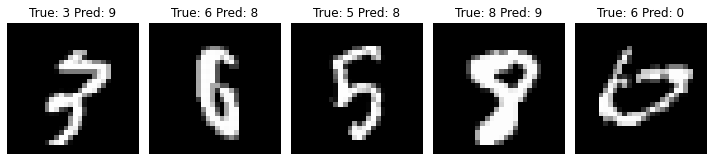

In [18]:
print("4e: 5 random misclassified images")
print(f"Error rate for test set is {(1 - acc) * 100:.2f}%")
fig = plt.figure(figsize=(10,10))
fig.patch.set_facecolor('white')
for i, img in enumerate(rand_imgs):
    plt.subplot(1,5,i+1)
    plt.title(f"True: {int(test_y[img])} Pred: {int(pred_y[img])}")
    plt.imshow(np.reshape(test_x[img,:], (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [19]:
_, post_probs = predict(test_x[rand_imgs,:], digit_probs, g)

In [20]:
post_probs[0,:].shape

(10,)

In [21]:
list(range(0,10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [22]:
print("4e: Proabilities for each image")
for i, img in enumerate(rand_imgs):
    print(f"Image: {i}")
    print(f"\tTrue: {int(test_y[img])} Pred: {int(pred_y[img])}")
    for d, p in zip(range(0,10), post_probs[i,:]):
        print(f"\t\t{d}: {p:.2f}")

4e: Proabilities for each image
Image: 0
	True: 3 Pred: 9
		0: -4118.78
		1: -4148.81
		2: -4066.97
		3: -4030.09
		4: -4022.89
		5: -4077.09
		6: -4138.78
		7: -3990.91
		8: -4000.31
		9: -3983.39
Image: 1
	True: 6 Pred: 8
		0: -4076.32
		1: -4041.44
		2: -4045.41
		3: -4024.00
		4: -4039.66
		5: -4002.96
		6: -4018.71
		7: -4092.40
		8: -3982.49
		9: -4038.53
Image: 2
	True: 5 Pred: 8
		0: -4051.66
		1: -4172.90
		2: -4075.56
		3: -3999.69
		4: -4023.58
		5: -3986.52
		6: -4043.88
		7: -4061.81
		8: -3983.29
		9: -3992.16
Image: 3
	True: 8 Pred: 9
		0: -4134.21
		1: -4305.06
		2: -4100.83
		3: -4029.59
		4: -4037.04
		5: -4074.33
		6: -4287.62
		7: -4009.46
		8: -4001.61
		9: -3975.83
Image: 4
	True: 6 Pred: 0
		0: -4016.95
		1: -4505.04
		2: -4129.17
		3: -4161.79
		4: -4127.97
		5: -4081.89
		6: -4024.14
		7: -4146.18
		8: -4168.95
		9: -4127.04


# WS 10 Q2

In [23]:
import pprint

import numpy as np

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [24]:
# Read in attribute matrix for clustering
data = np.full([50, 85], np.nan)
with open('./predicate-matrix-continuous.txt') as f:
    for i,l in enumerate(f):
        data[i,:] = np.array(str.split(l)) # strip used to handle uneven number of spaces on each line
assert not np.isnan(data).any(), f"reading in data matrix failed, NaNs still present"
assert data.dtype == 'float64', f"Failed to get right type"

In [25]:
animals = []
with open('./classes.txt') as f:
    for i,l in enumerate(f):
        animals.append(str.split(l)[-1])
a = np.asarray(animals)

In [26]:
# run kmeans
kmeans = KMeans(n_clusters=10, random_state=0)
pred = kmeans.fit_predict(data)

In [27]:
k_res = {k: a[np.where(pred == k)].tolist() for k in range(10)}

print("2a: The animal clusters are listed below.")
pp = pprint.PrettyPrinter(indent=4)
pp.pprint(k_res)

2a: The animal clusters are listed below.
{   0: ['antelope', 'horse', 'moose', 'giraffe', 'zebra', 'deer'],
    1: ['tiger', 'leopard', 'fox', 'wolf', 'weasel', 'bobcat', 'lion'],
    2: ['killer+whale', 'blue+whale', 'humpback+whale', 'walrus', 'dolphin'],
    3: [   'skunk',
           'mole',
           'hamster',
           'squirrel',
           'rabbit',
           'rat',
           'mouse',
           'raccoon'],
    4: [   'dalmatian',
           'persian+cat',
           'german+shepherd',
           'siamese+cat',
           'chihuahua',
           'collie'],
    5: [   'hippopotamus',
           'elephant',
           'ox',
           'sheep',
           'rhinoceros',
           'buffalo',
           'giant+panda',
           'pig',
           'cow'],
    6: ['spider+monkey', 'gorilla', 'chimpanzee'],
    7: ['bat'],
    8: ['beaver', 'seal', 'otter'],
    9: ['grizzly+bear', 'polar+bear']}


Overall, the clustering solution is farily reasonable. There are some oddities such as seal being grouped with beaver and otter instead of with walrus as well as small cats and small dogs being mixed together. It would make more sense if there was a cluster that captured big and small cats and another cluster that captures small dogs with foxes and wolves. However, with very little code involved, the resulting clusters are pretty reasonable for the most part.

In [28]:
tree = linkage(data, 'ward')

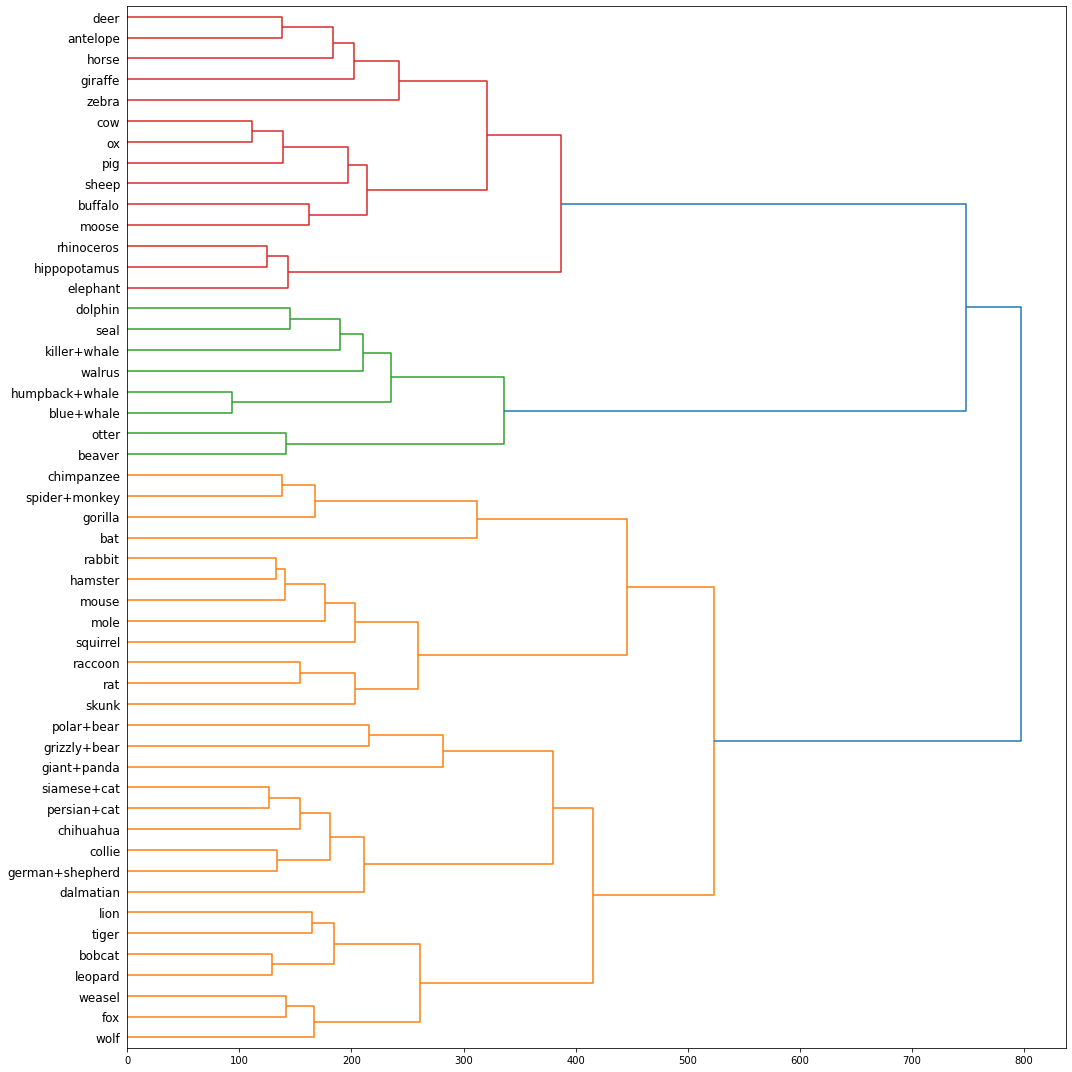

In [29]:
fig = plt.figure(figsize=(15,15))
dn = dendrogram(tree, labels=a, leaf_font_size=12,orientation='right')
fig.patch.set_facecolor('white')
plt.tight_layout()

The Tree seems reasonable. It groups all the aquatic animals into a representitive group. Bigger cats are related to one another while smalelr cats are related to each other. However, smaller cats are more closely related to bigger cats than to small dogs, which the tree fails to captue. The same occurs with fox and wolf being closer to bigger cats than the smaller dogs. So while the tree does a fairly good job assessing relationships between animals, it is far from perfect.